In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
df = pd.read_csv("data/tableau_import.csv")

In [43]:
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier_2 = RandomForestClassifier(n_estimators=100)

In [3]:
df['partisanship_change']

0        -1.000000
1        -1.000000
2        -0.777778
3        -1.000000
4        -0.333333
            ...   
227272    0.000000
227273   -1.000000
227274   -1.000000
227275   -1.000000
227276   -1.000000
Name: partisanship_change, Length: 227277, dtype: float64

4

In [4]:
def return_change_class(input, weight):
    weight = abs(weight)
    if input < -weight:
        return 'D'
    elif input > weight:
        return 'R'
    else:
        return 'N'

In [6]:
df['partisanship_2010'].head()

0    0.0
1    0.0
2   -1.0
3    0.0
4    0.0
Name: partisanship_2010, dtype: float64

In [7]:
df['categorization'] = df['partisanship_2010'].apply(lambda x:return_change_class(x, 0.5))

In [8]:
df['categorization'] += 's'

In [10]:
df['categorization'] += df['partisanship_change'].apply(lambda x:return_change_class(x,0.12))

In [12]:
df.groupby('categorization')['id'].count()

categorization
DsD      4378
DsN      1519
DsR      3573
NsD    128738
NsN     25357
NsR     36539
RsD     20725
RsN      2727
RsR      3721
Name: id, dtype: int64

In [16]:
df2 = pd.concat(list(map(lambda x: df.loc[df['categorization']==x,:].sample(n=10000, replace=True),['DsD', 'DsN', 'DsR', 'NsD', 'NsN', 'NsR', 'RsD', 'RsN', 'RsR'])))
df2 = df2.drop(columns=['political_interest_2019', 'partisanship_2019', 'partisanship_change', 'id'])

In [4]:
df['partisanship_change_class'] = df['partisanship_change'].apply(lambda x:return_change_class(x,0.12))

In [5]:
df2 = df.drop(columns=['political_interest_2019', 'partisanship_2019', 'partisanship_change', 'id'])

In [87]:
scaler = StandardScaler()
scaler.fit(df2.drop(columns=['categorization', 'density', 'armed_forces_population']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [108]:
train, test = train_test_split(df2, test_size=0.2)

In [15]:
Y_train = train['partisanship_change_class']
X_train = train.drop(columns=['partisanship_change_class'])
Y_test = test['partisanship_change_class']
X_test = test.drop(columns=['partisanship_change_class'])

In [16]:
Y_train = OHE.fit_transform(Y_train.to_numpy().reshape(-1,1))
Y_test = OHE.transform(Y_test.to_numpy().reshape(-1,1))

NameError: name 'OHE' is not defined

In [63]:
drop_list = [x for x in X_train.columns if 'eigvec' in x and int(x.split("eigvec_")[1]) < 0]
print(drop_list)
#RF_classifier.fit(X_train.drop(columns=drop_list), Y_train)

[]


ValueError: operands could not be broadcast together with shapes (2,10) (183,) (2,10) 

In [32]:
RF_classifier_2.fit(X_train.drop(columns=[x for x in X_train.columns if 'eigvec' in x]), Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
RF_classifier.score(X_test.drop(columns=drop_list), Y_test)

0.4885333333333333

In [34]:
RF_classifier_2.score(X_test.drop(columns=[x for x in X_test.columns if 'eigvec' in x]), Y_test)

0.4488

In [84]:
k = range(115,160)[::3]

In [85]:
k = list(k) + [160]

In [86]:
k = [0,10,20,30,40,50,60,70,80,90,100,110] + k

In [31]:
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)

In [109]:
Y_train = train['categorization']
X_train = train.drop(columns=['categorization', 'density', 'armed_forces_population'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test.drop(columns=['categorization', 'density', 'armed_forces_population'])), columns=X_train.columns)

In [92]:
scores = []
for k_item in k:
    RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
    x_train_temp = X_train.drop(columns = [x for x in X_train.columns if 'eigvec' in x and int(x.split('eigvec_')[1]) < k_item])
    x_test_temp = X_test[x_train_temp.columns]
    RF_classifier.fit(x_train_temp, Y_train)
    temp = RF_classifier.score(x_test_temp, Y_test)
    print(k_item, temp)
    scores.append(temp)

0 0.8180555555555555
10 0.8172777777777778
20 0.8177777777777778
30 0.8192777777777778
40 0.8156111111111111
50 0.8187222222222222
60 0.8215555555555556
70 0.8168333333333333
80 0.8192777777777778
90 0.821
100 0.8193888888888889
110 0.8190555555555555
115 0.8192222222222222
118 0.819
121 0.8191666666666667
124 0.8203888888888888
127 0.8192222222222222
130 0.8187222222222222
133 0.8167777777777778
136 0.8166666666666667
139 0.819
142 0.8158888888888889
145 0.8147777777777778
148 0.8173888888888889
151 0.8147777777777778
154 0.8115
157 0.8040555555555555
160 0.7893333333333333


In [94]:
x_train_temp = X_train.drop(columns = [x for x in X_train.columns if 'eigvec' in x or 'influence' in x])
x_test_temp = X_test[x_train_temp.columns]
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
RF_classifier.fit(x_train_temp, Y_train)
print(RF_classifier.score(x_test_temp, Y_test))

0.5502222222222222


In [104]:
x_cols = [x for x in X_train.columns if 'eigvec' not in x]
eigs = [x for x in X_train.columns if 'eigvec' in x]

In [107]:
list(pd.Series(eigs).sample(0))

[]

In [100]:
x_cols_2 = [x for x in x_cols if 'influence' not in x]

In [116]:
k = list(range(11))
print(k)
scores_w_influence = []
scores_w_out_influence = []
for k_item in k:
    temp_scores_2 = []
    for t in range(15):
        RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)
        temp_cols_2 = list(pd.Series(eigs).sample(n=k_item))
        these_cols = x_cols_2 + temp_cols_2
        print(these_cols)
        RF_classifier.fit(X_train[these_cols], Y_train)
        temp_2 = RF_classifier.score(X_test[x_cols_2+temp_cols_2], Y_test)
        print(temp_2)
        temp_scores_2.append(temp_2)
    print(temp_scores_2)
    scores_w_out_influence.append(temp_scores_2)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
['total_population', 'non_white_population', 'hispanic_population', 'foreign_born_population', 'median_household_income', 'mean_household_income', 'poverty_population', 'total_housing_units', 'units_paying_rent', 'agriculture_industry', 'information_industry', 'financial_industry', 'entertainment_industry', 'government_employee', 'degree', 'veteran_population', 'incarcerated', 'political_interest_2010', 'partisanship_2010']
0.5507222222222222
['total_population', 'non_white_population', 'hispanic_population', 'foreign_born_population', 'median_household_income', 'mean_household_income', 'poverty_population', 'total_housing_units', 'units_paying_rent', 'agriculture_industry', 'information_industry', 'financial_industry', 'entertainment_industry', 'government_employee', 'degree', 'veteran_population', 'incarcerated', 'political_interest_2010', 'partisanship_2010']
0.5501111111111111
['total_population', 'non_white_population', 'hispanic_population', 'fo

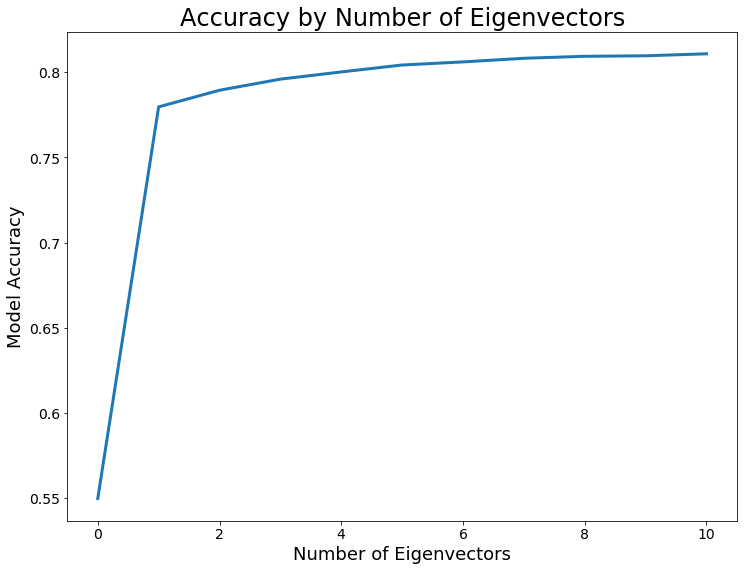

In [370]:
from statistics import mean, stdev
[mean(x) for x in scores_w_out_influence]
plt.figure(figsize=(12,9))
plt.plot(range(11), [mean(x) for x in scores_w_out_influence], linewidth=3)
ax = plt.gca()
ax.set_yticklabels([0.5,0.55,0.6,0.65,0.7,0.75,0.8], fontdict={'fontsize':14})
plt.ylabel("Model Accuracy", fontsize=18)
plt.title("Accuracy by Number of Eigenvectors", fontsize=24)
plt.xlabel("Number of Eigenvectors", fontsize=18)
plt.xticks(fontsize=14)
plt.savefig("eigenvector_number.png")

In [123]:
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1)
x_train_temp = X_train.drop(columns=[x for x in X_train.columns if 'eigvec' in x])
x_test_temp = X_test[x_train_temp.columns]

In [126]:
RF_classifier.fit(x_train_temp, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [127]:
RF_classifier.score(x_test_temp, Y_test)

0.7895

In [128]:
RF_classifier.predict(x_test_temp.loc[:100,:])

array(['RsN', 'DsN', 'RsD', 'DsR', 'RsN', 'RsD', 'RsR', 'RsR', 'RsR',
       'RsR', 'NsR', 'DsR', 'DsR', 'RsR', 'DsR', 'RsN', 'NsD', 'RsR',
       'NsN', 'NsD', 'RsR', 'RsD', 'NsD', 'DsN', 'RsN', 'RsR', 'RsD',
       'NsD', 'NsD', 'DsD', 'DsN', 'RsN', 'DsR', 'RsD', 'DsD', 'RsN',
       'RsR', 'RsR', 'RsR', 'DsR', 'NsR', 'RsR', 'NsD', 'RsD', 'DsD',
       'RsD', 'DsN', 'RsR', 'RsR', 'RsD', 'RsD', 'DsN', 'NsN', 'DsR',
       'DsD', 'RsN', 'RsN', 'NsN', 'RsN', 'RsR', 'DsR', 'DsR', 'NsN',
       'DsD', 'DsN', 'NsN', 'RsN', 'NsN', 'NsN', 'NsR', 'NsR', 'DsD',
       'DsN', 'DsD', 'DsD', 'RsN', 'RsN', 'RsD', 'RsN', 'NsD', 'NsD',
       'DsD', 'NsR', 'RsN', 'RsR', 'NsR', 'RsR', 'NsD', 'DsN', 'RsD',
       'NsR', 'NsD', 'DsD', 'RsN', 'NsR', 'NsR', 'DsN', 'DsR', 'NsD',
       'RsN', 'DsR'], dtype=object)

In [131]:
list(Y_test[:100])

['RsN',
 'DsN',
 'RsD',
 'DsR',
 'RsN',
 'RsD',
 'RsR',
 'RsR',
 'RsD',
 'RsR',
 'NsN',
 'DsR',
 'DsR',
 'RsR',
 'DsR',
 'RsN',
 'NsD',
 'RsR',
 'NsR',
 'NsD',
 'RsR',
 'RsD',
 'NsD',
 'DsN',
 'RsN',
 'RsR',
 'RsD',
 'NsD',
 'NsN',
 'DsD',
 'DsN',
 'RsN',
 'DsR',
 'RsN',
 'DsD',
 'RsN',
 'RsR',
 'RsR',
 'RsR',
 'DsR',
 'NsR',
 'RsR',
 'NsD',
 'RsD',
 'DsD',
 'RsD',
 'DsN',
 'RsD',
 'RsD',
 'RsD',
 'RsD',
 'DsD',
 'NsN',
 'DsR',
 'DsD',
 'RsN',
 'RsN',
 'NsN',
 'RsD',
 'RsR',
 'DsR',
 'DsR',
 'NsD',
 'DsD',
 'DsN',
 'NsN',
 'RsN',
 'NsN',
 'NsD',
 'NsD',
 'NsR',
 'DsD',
 'DsN',
 'DsD',
 'DsD',
 'RsN',
 'RsN',
 'RsD',
 'RsN',
 'NsR',
 'NsD',
 'DsD',
 'NsR',
 'RsN',
 'RsR',
 'NsN',
 'RsR',
 'NsN',
 'DsN',
 'RsD',
 'NsR',
 'NsD',
 'DsD',
 'RsN',
 'NsN',
 'NsR',
 'DsN',
 'DsR',
 'NsR',
 'RsN']

In [97]:
scores_2 = []
for k_item in k:
    RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
    x_train_temp = X_train.drop(columns = [x for x in X_train.columns if ('eigvec' in x and (int(x.split('eigvec_')[1]) < k_item or int(x.split('eigvec_')[1])>=157)) or ('influence' in x)])
    x_test_temp = X_test[x_train_temp.columns]
    RF_classifier.fit(x_train_temp, Y_train)
    temp = RF_classifier.score(x_test_temp, Y_test)
    print(k_item, temp)
    scores_2.append(temp)

0 0.8142222222222222
10 0.8152222222222222
20 0.8158888888888889
30 0.8141666666666667
40 0.8150555555555555
50 0.8178333333333333
60 0.816
70 0.8168888888888889
80 0.8162222222222222
90 0.8176111111111111
100 0.8153888888888889
110 0.8156666666666667
115 0.8181666666666667
118 0.8165
121 0.8159444444444445
124 0.8177777777777778
127 0.8167777777777778
130 0.8179444444444445
133 0.8178888888888889
136 0.8158888888888889
139 0.8145555555555556
142 0.8127777777777778
145 0.814
148 0.8098888888888889
151 0.8073888888888889
154 0.7985555555555556
157 0.5507222222222222
160 0.5495


In [32]:
#X_test = X_test.drop(columns=drop_cols[0])
#X_train = X_train.drop(columns=drop_cols[0])
RF_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [33]:
RF_classifier.score(X_test, Y_test)

0.8211666666666667

In [24]:
def get_feature_importance(classifier, var, x_test, y_test, num_tests=1):
    x_test = x_test.copy()
    norm_score = classifier.score(x_test, y_test)
    from statistics import mean
    scores = []
    for k in range(num_tests):
        x_test.loc[:,var] = x_test[var].sample(frac=1.).to_numpy()
        scores.append(classifier.score(x_test, y_test))
    return (norm_score - mean(scores))

In [32]:
from statistics import mean
mean([4,6,7])

5.666666666666667

In [25]:
get_feature_importance(RF_classifier, 'eigvec_159', X_test, Y_test,num_tests = 10)

0.001483333333333281

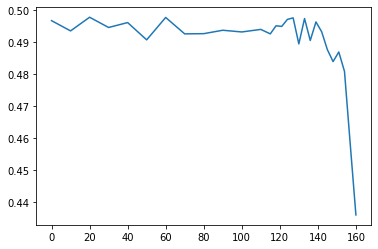

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k,test_scores)

In [35]:
out = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    out[x] = temp


total_population 0.0012444444444444924
non_white_population 0.0007000000000000339
hispanic_population 0.0005555555555555314
foreign_born_population 0.0017000000000000348
median_household_income 0.00038333333333340214
mean_household_income 0.0004444444444444695
poverty_population 0.0007500000000000284
total_housing_units 6.11111111111784e-05
units_paying_rent 0.0014611111111111352
agriculture_industry 0.0006000000000000449
information_industry 0.0001777777777778322
financial_industry 0.000983333333333447
entertainment_industry 0.0002500000000000835
government_employee 0.0005277777777777937
armed_forces_population -0.0005388888888888665
degree 0.0011388888888889115
veteran_population 0.0009222222222222687
incarcerated 0.00021111111111116188
political_influence_2010 0.0014555555555556543
political_interest_2010 0.0023500000000000743
partisanship_influence_2010 0.0025277777777777954
partisanship_2010 0.004750000000000032
eigvec_1 0.000300000000000078
eigvec_2 -0.0005333333333332746
eigvec_

In [35]:
drop_cols = [k for k,v in out.items() if v < 0.0]
print(drop_cols)

['non_white_population', 'foreign_born_population', 'mean_household_income', 'total_housing_units', 'entertainment_industry', 'armed_forces_population', 'degree', 'incarcerated', 'eigvec_1', 'eigvec_4', 'eigvec_5', 'eigvec_7', 'eigvec_9', 'eigvec_14', 'eigvec_16', 'eigvec_19', 'eigvec_20', 'eigvec_21', 'eigvec_22', 'eigvec_23', 'eigvec_24', 'eigvec_25', 'eigvec_26', 'eigvec_27', 'eigvec_28', 'eigvec_29', 'eigvec_38', 'eigvec_39', 'eigvec_40', 'eigvec_41', 'eigvec_42', 'eigvec_44', 'eigvec_46', 'eigvec_49', 'eigvec_50', 'eigvec_51', 'eigvec_52', 'eigvec_53', 'eigvec_55', 'eigvec_56', 'eigvec_58', 'eigvec_59', 'eigvec_60', 'eigvec_62', 'eigvec_65', 'eigvec_66', 'eigvec_67', 'eigvec_70', 'eigvec_72', 'eigvec_73', 'eigvec_74', 'eigvec_76', 'eigvec_82', 'eigvec_84', 'eigvec_85', 'eigvec_86', 'eigvec_87', 'eigvec_88', 'eigvec_89', 'eigvec_90', 'eigvec_91', 'eigvec_93', 'eigvec_94', 'eigvec_96', 'eigvec_97', 'eigvec_98', 'eigvec_101', 'eigvec_102', 'eigvec_104', 'eigvec_105', 'eigvec_106', 'e

<BarContainer object of 21 artists>

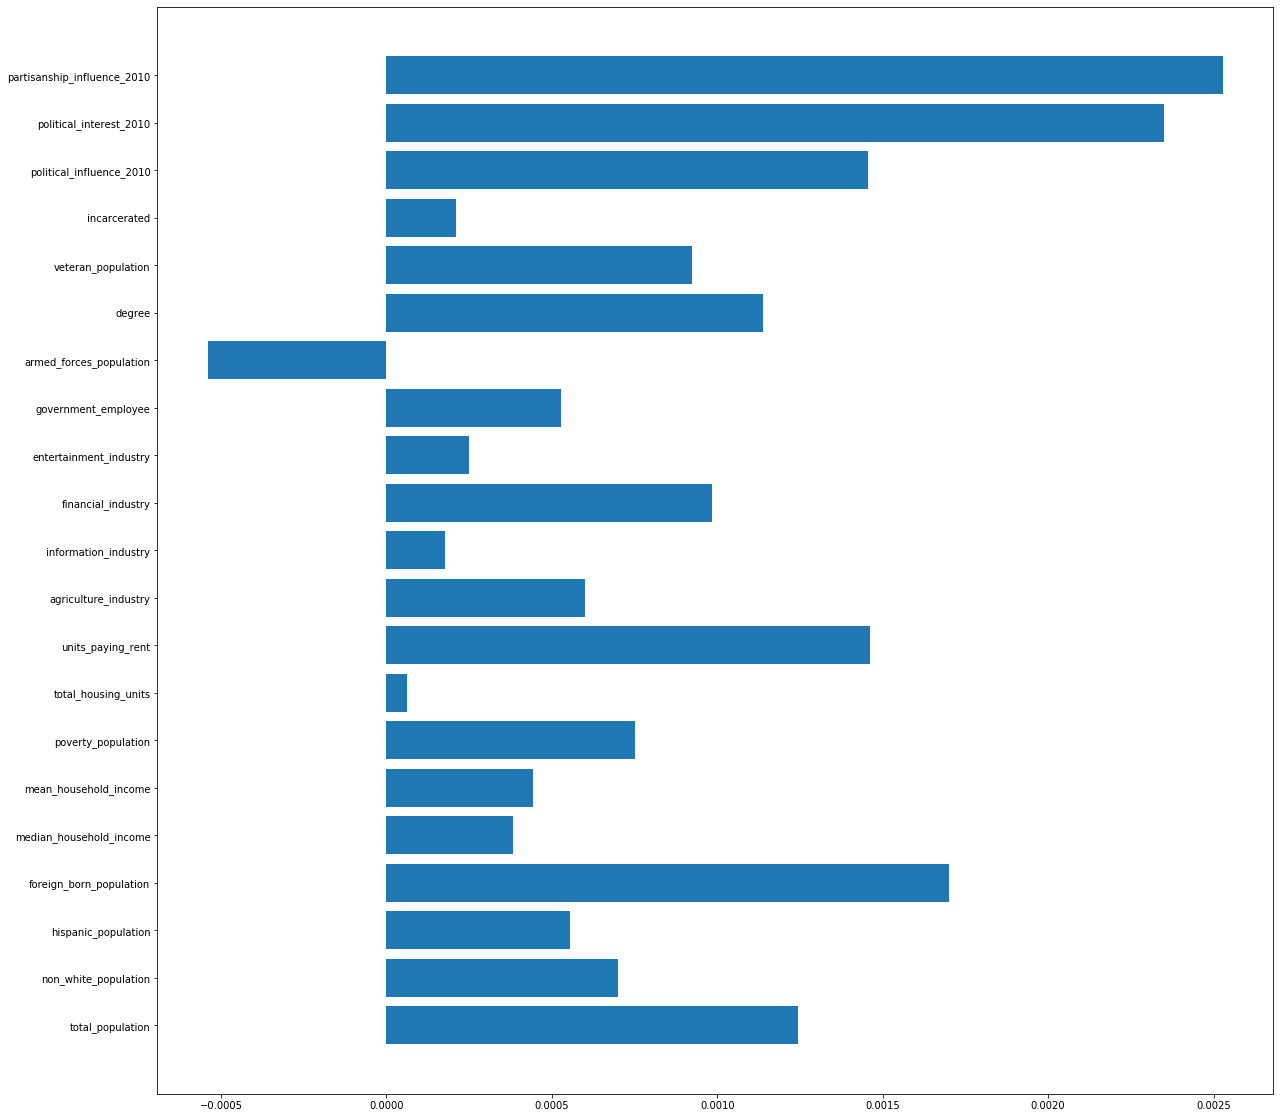

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,20))
out2 = {k:v for k,v in out.items() if 'eigvec' not in k and k != 'partisanship_2010'}
plt.barh(list(out2.keys()), list(out2.values()))

In [43]:
df_out = pd.Series(out2)

In [55]:
df_out = df_out.sort_values(ascending=True)

In [58]:
len(df_out)

21

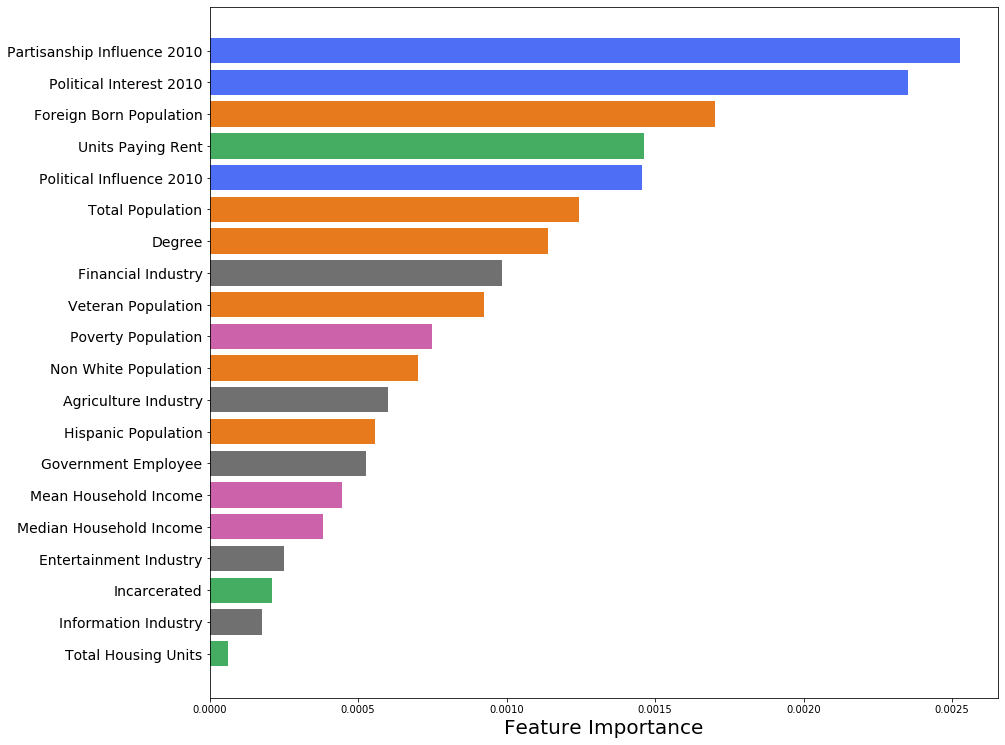

In [341]:
plt.figure(figsize=(15,12))
colors = {
    'h':'#44AD62',
    'd':'#E67A1C',
    'e':'#CC62AA',
    'i':'#707070',
    'o':'#4E6EF5'
}
#df_out = df_out.drop('armed_forces_population')
col_list = [colors[x] for x in 'hihieeididediddohdoo']
plt.barh([x.replace('_',' ').title() for x in list(df_out.index)], df_out, color=col_list)
plt.xlabel("Feature Importance", fontsize=20)
ax = plt.gca()
ax.set_position((0.25, 0.15, 0.73, 0.80))
ax.set_yticklabels([x.replace('_',' ').title() for x in list(df_out.index)], fontdict={'fontsize':14})
plt.savefig("feature_importance.png")

## df_out.loc[:]

In [16]:
drop_cols = ['non_white_population',
 'armed_forces_population',
 'eigvec_1',
 'eigvec_7',
 'eigvec_14',
 'eigvec_25',
 'eigvec_44',
 'eigvec_46',
 'eigvec_49',
 'eigvec_52',
 'eigvec_53',
 'eigvec_56',
 'eigvec_58',
 'eigvec_65',
 'eigvec_70',
 'eigvec_72',
 'eigvec_74',
 'eigvec_87',
 'eigvec_93',
 'eigvec_98',
 'eigvec_102',
 'eigvec_108',
 'eigvec_110',
 'eigvec_122',
 'eigvec_124',
 'eigvec_132']
reg_class2 = RandomForestClassifier(n_estimators=100, n_jobs = -1)
reg_class2.fit(X_train.drop(columns=drop_cols), Y_train)
print(reg_class2.score(X_test.drop(columns=drop_cols), Y_test))

0.4905333333333333


In [40]:
temp = list(X_train.columns)

In [46]:
[x for x in X_train.columns if x not in temp]

['non_white_population',
 'armed_forces_population',
 'eigvec_1',
 'eigvec_7',
 'eigvec_14',
 'eigvec_25',
 'eigvec_44',
 'eigvec_46',
 'eigvec_49',
 'eigvec_52',
 'eigvec_53',
 'eigvec_56',
 'eigvec_58',
 'eigvec_65',
 'eigvec_70',
 'eigvec_72',
 'eigvec_74',
 'eigvec_87',
 'eigvec_93',
 'eigvec_98',
 'eigvec_102',
 'eigvec_108',
 'eigvec_110',
 'eigvec_122',
 'eigvec_124',
 'eigvec_132']

In [157]:
df3 = df2.drop(columns = ['density', 'partisanship_2010'] + [x for x in df2.columns if 'eigvec' in x])
scaler.fit(df3.drop(columns=['categorization']))
train, test = train_test_split(df3, test_size=0.2)
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)

In [158]:
dems_df = pd.concat(map(lambda x:df3.groupby(by='categorization').get_group(x), ['DsD', 'DsN', 'DsR']))

In [159]:
dems_df.shape

(30000, 22)

In [160]:
dems_df = dems_df.sample(frac = 1)
train, test = train_test_split(dems_df, test_size=0.2)

In [162]:
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)

In [163]:
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)

In [164]:
RF_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [165]:
RF_classifier.score(X_test, Y_test)

0.9543333333333334

In [166]:
out = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    out[x] = temp

total_population -0.0019333333333333425
non_white_population -0.0008333333333333526
hispanic_population -0.0018166666666666886
foreign_born_population -0.0026999999999999247
median_household_income -0.0009333333333333416
mean_household_income -0.0020000000000000018
poverty_population -0.0020166666666666666
total_housing_units -0.0015499999999999403
units_paying_rent -0.001783333333333248
agriculture_industry -0.0022499999999999742
information_industry -0.0013666666666666272
financial_industry -0.0021333333333333204
entertainment_industry -0.0009333333333333416
government_employee -0.002083333333333326
armed_forces_population -0.0011999999999999789
degree -0.0018333333333333535
veteran_population -0.002449999999999952
incarcerated -0.0018666666666666831
political_influence_2010 0.31448333333333334
political_interest_2010 0.0649333333333334
partisanship_influence_2010 0.38136666666666674


In [167]:
dems_out= out

In [168]:
reps_df = pd.concat(map(lambda x:df3.groupby(by='categorization').get_group(x), ['RsD', 'RsN', 'RsR']))
reps_df = reps_df.sample(frac = 1)
train, test = train_test_split(reps_df, test_size=0.2)
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
RF_classifier.fit(X_train, Y_train)
print(RF_classifier.score(X_test, Y_test))
reps_out = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    reps_out[x] = temp

0.8893333333333333
total_population -0.007650000000000046
non_white_population -0.0028333333333333544
hispanic_population -0.004683333333333373
foreign_born_population 0.00876666666666659
median_household_income -0.004216666666666646
mean_household_income -0.0035166666666667235
poverty_population -0.004566666666666719
total_housing_units -0.002466666666666728
units_paying_rent -0.005800000000000027
agriculture_industry -0.003066666666666662
information_industry -0.004133333333333322
financial_industry -0.005016666666666669
entertainment_industry -0.004266666666666752
government_employee -0.004666666666666708
armed_forces_population -0.00385000000000002
degree -0.004483333333333395
veteran_population -0.004366666666666741
incarcerated -0.005133333333333323
political_influence_2010 0.23788333333333334
political_interest_2010 0.06523333333333325
partisanship_influence_2010 0.3552166666666666


In [169]:
n_df = pd.concat(map(lambda x:df3.groupby(by='categorization').get_group(x), ['NsD', 'NsN', 'NsR']))
n_df = n_df.sample(frac = 1)
train, test = train_test_split(n_df, test_size=0.2)
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
RF_classifier.fit(X_train, Y_train)
print(RF_classifier.score(X_test, Y_test))
n_out = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    n_out[x] = temp

0.5315
total_population -0.008300000000000085
non_white_population -0.0044000000000000705
hispanic_population -0.004383333333333406
foreign_born_population -0.0017333333333333645
median_household_income -0.006033333333333335
mean_household_income -0.007033333333333336
poverty_population -0.004533333333333389
total_housing_units -0.0012666666666666382
units_paying_rent -0.005116666666666658
agriculture_industry -0.004383333333333406
information_industry -0.005850000000000022
financial_industry -0.004316666666666635
entertainment_industry -0.0020999999999999908
government_employee -0.00491666666666668
armed_forces_population -0.0030999999999999917
degree -0.0031333333333333213
veteran_population -0.0025333333333333874
incarcerated -0.0054833333333333956
political_influence_2010 0.06598333333333328
political_interest_2010 0.0027333333333333654
partisanship_influence_2010 0.07931666666666665


In [175]:
reps_df_n_infl = pd.concat(map(lambda x:df3.groupby(by='categorization').get_group(x), ['RsD', 'RsN', 'RsR']))
reps_df_n_infl = reps_df_n_infl.sample(frac = 1)
train, test = train_test_split(reps_df_n_infl, test_size=0.2)
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)
X_train = X_train.drop(columns=[x for x in X_train if 'influence' in x or 'interest' in x])
X_test = X_test.drop(columns=[x for x in X_test if 'influence' in x or 'interest' in x])
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
RF_classifier.fit(X_train, Y_train)
print(RF_classifier.score(X_test, Y_test))
reps_out_n_infl = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    reps_out_n_infl[x] = temp

0.5361666666666667
total_population 0.0038166666666666904
non_white_population -0.002283333333333304
hispanic_population -0.00019999999999997797
foreign_born_population 0.028850000000000042
median_household_income -0.0017333333333333645
mean_household_income -0.0022999999999999687
poverty_population -0.0015999999999999348
total_housing_units 0.0011666666666666492
units_paying_rent 0.0014166666666667327
agriculture_industry 0.005199999999999982
information_industry 0.00028333333333330213
financial_industry -0.0004999999999999449
entertainment_industry -0.0017500000000000293
government_employee -0.0004166666666666208
armed_forces_population -0.0012166666666666437
degree -0.0015333333333333865
veteran_population 0.006066666666666665
incarcerated 0.000500000000000056


In [174]:
dems_df_n_infl = pd.concat(map(lambda x:df3.groupby(by='categorization').get_group(x), ['DsD', 'DsN', 'DsR']))
dems_df_n_infl = dems_df_n_infl.sample(frac = 1)
train, test = train_test_split(dems_df_n_infl, test_size=0.2)
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)
X_train = X_train.drop(columns=[x for x in X_train if 'influence' in x or 'interest' in x])
X_test = X_test.drop(columns=[x for x in X_test if 'influence' in x or 'interest' in x])
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
RF_classifier.fit(X_train, Y_train)
print(RF_classifier.score(X_test, Y_test))
dems_out_n_infl = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    dems_out_n_infl[x] = temp

0.5038333333333334
total_population 0.002883333333333349
non_white_population 0.0063333333333333575
hispanic_population 0.0028000000000000247
foreign_born_population 0.007966666666666677
median_household_income 0.0023000000000000798
mean_household_income 0.0033833333333332938
poverty_population 0.0027166666666667005
total_housing_units 0.00018333333333331314
units_paying_rent 0.0010333333333333306
agriculture_industry 0.003983333333333339
information_industry 0.0012666666666667492
financial_industry 0.0028000000000000247
entertainment_industry 0.001583333333333381
government_employee 0.007000000000000006
armed_forces_population 0.004666666666666708
degree 0.0007333333333333636
veteran_population 0.0034166666666667345
incarcerated 0.004083333333333383


<BarContainer object of 18 artists>

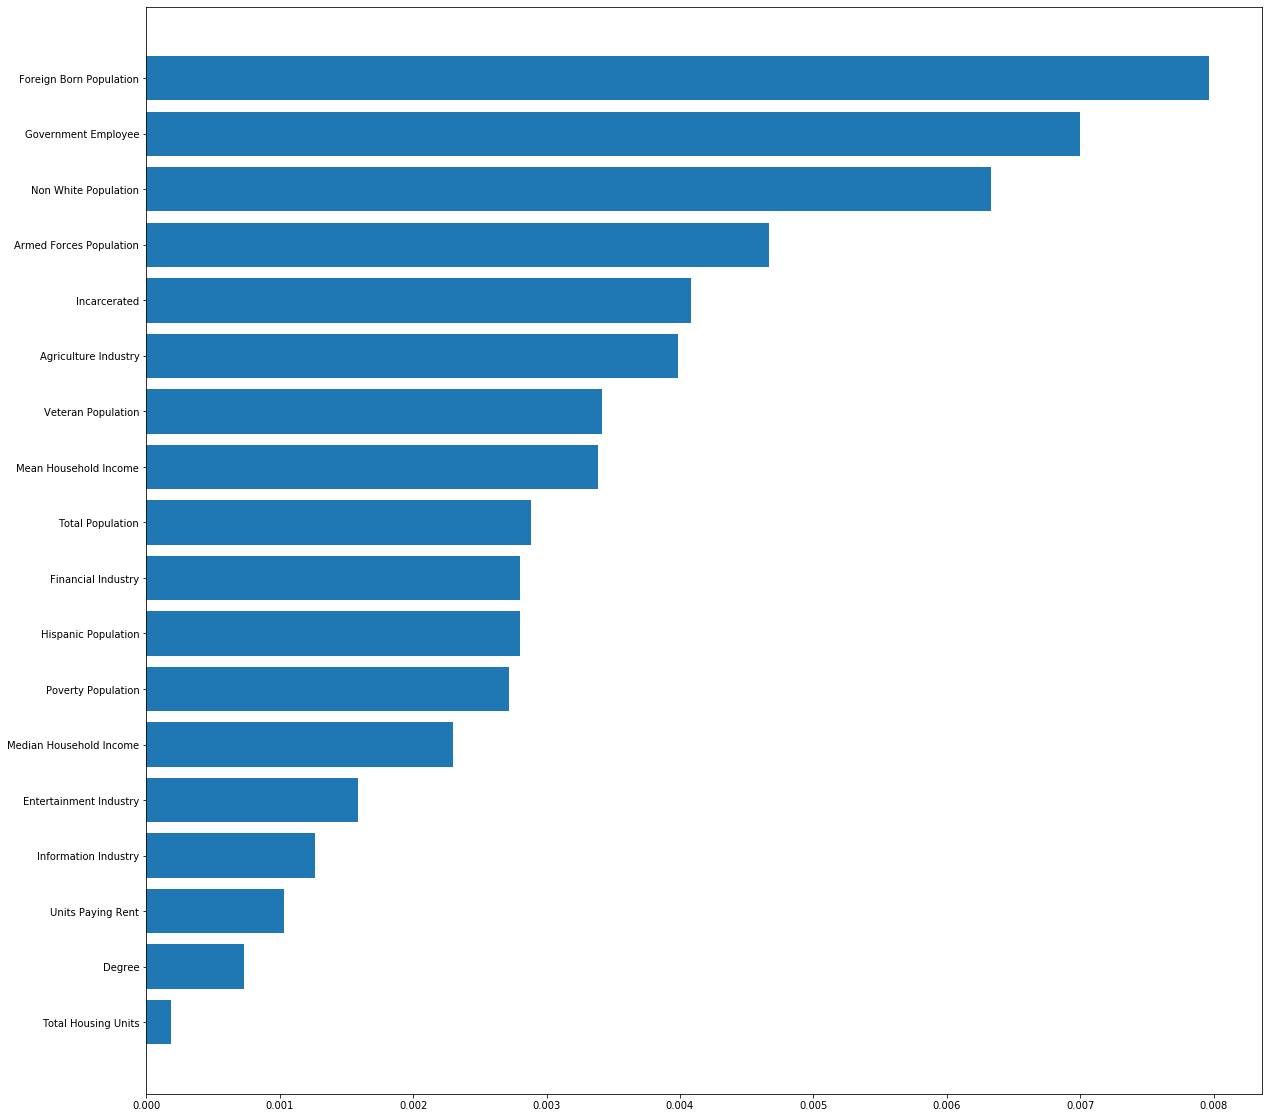

In [245]:
plt.figure(figsize=(20,20))
dat = pd.Series(dems_out_n_infl).sort_values()
plt.barh([x.replace('_', ' ').title() for x in dat.index], dat)

<BarContainer object of 18 artists>

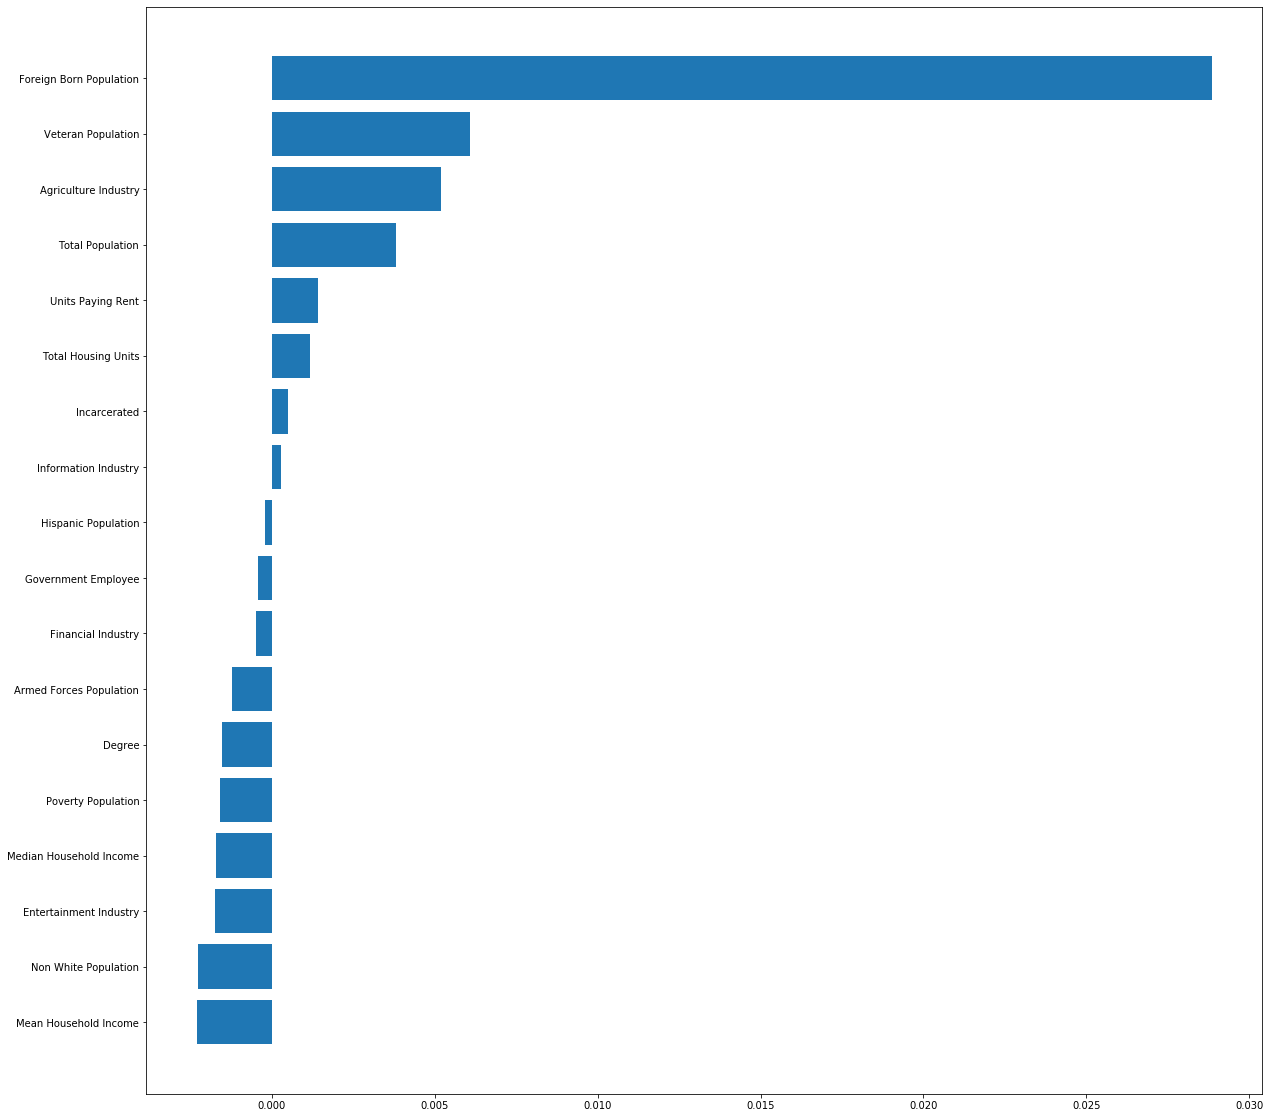

In [183]:
plt.figure(figsize=(20,20))
dat = pd.Series(reps_out_n_infl).sort_values()
plt.barh([x.replace('_', ' ').title() for x in dat.index], dat)

In [179]:
n_df_n_infl = pd.concat(map(lambda x:df3.groupby(by='categorization').get_group(x), ['NsD', 'NsN', 'NsR']))
n_df_n_infl = n_df_n_infl.sample(frac = 1)
train, test = train_test_split(n_df_n_infl, test_size=0.2)
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)
X_train = X_train.drop(columns=[x for x in X_train if 'influence' in x or 'interest' in x])
X_test = X_test.drop(columns=[x for x in X_test if 'influence' in x or 'interest' in x])
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
RF_classifier.fit(X_train, Y_train)
print(RF_classifier.score(X_test, Y_test))
n_out_n_infl = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    n_out_n_infl[x] = temp

0.4746666666666667
total_population 0.007633333333333325
non_white_population -0.002899999999999958
hispanic_population -0.0006333333333333191
foreign_born_population 0.010333333333333361
median_household_income 0.0009666666666666712
mean_household_income 0.00040000000000001146
poverty_population -0.0007999999999999674
total_housing_units 0.0022833333333333594
units_paying_rent 0.00438333333333335
agriculture_industry 0.0013000000000000234
information_industry 0.0007166666666666988
financial_industry 0.0011666666666667047
entertainment_industry -0.0022166666666666446
government_employee -0.0003333333333332966
armed_forces_population -0.0015666666666666607
degree 0.0008166666666666877
veteran_population 0.004816666666666691
incarcerated -0.0004333333333333411


<BarContainer object of 18 artists>

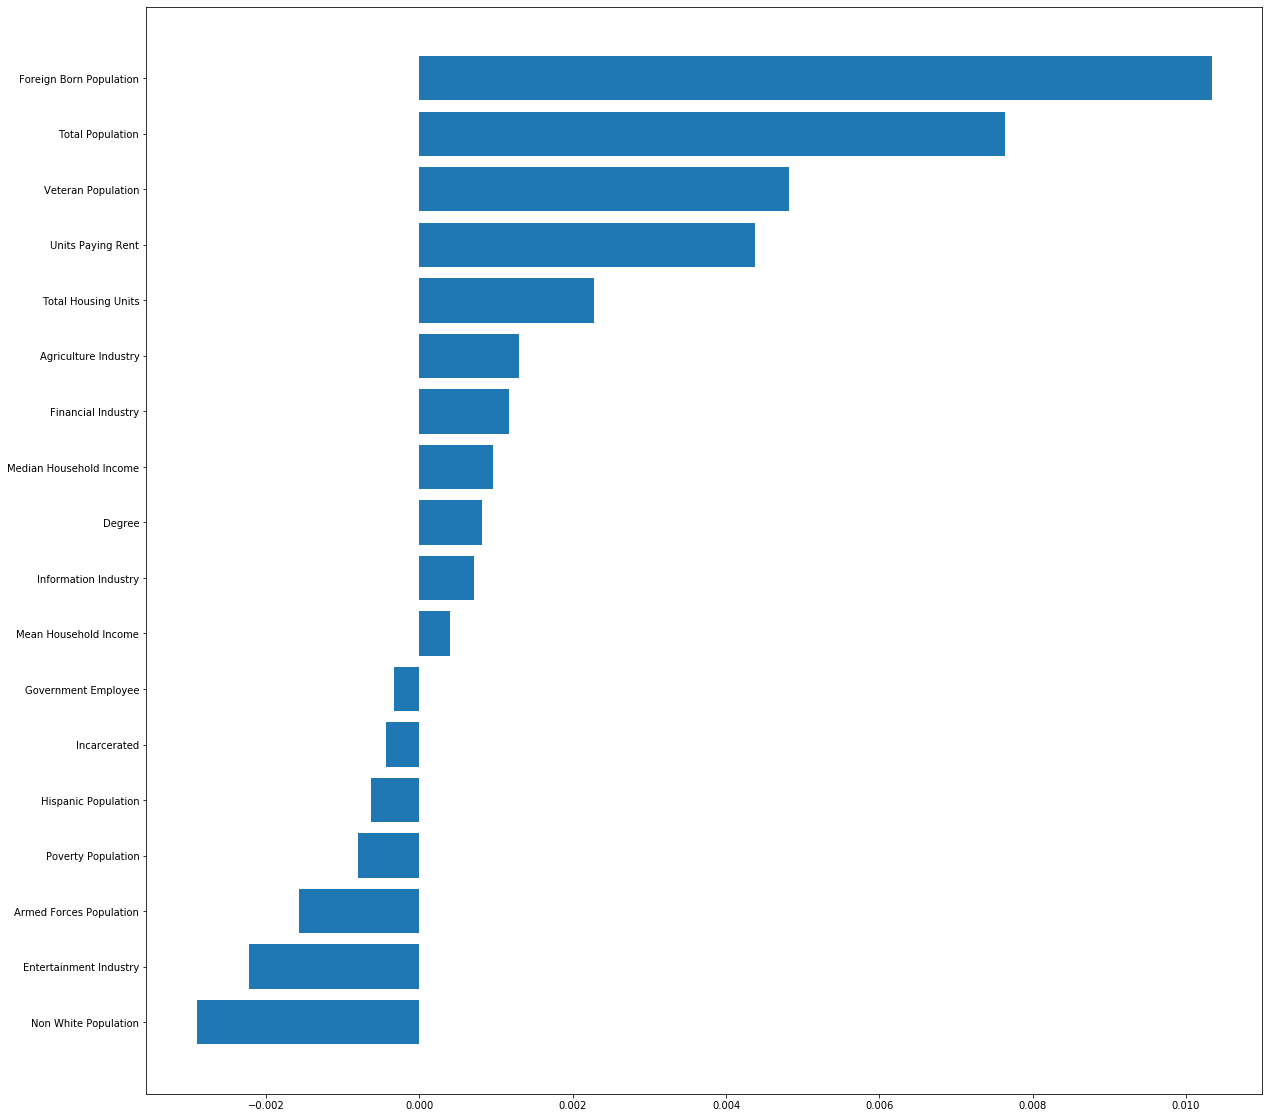

In [184]:
plt.figure(figsize=(20,20))
dat = pd.Series(n_out_n_infl).sort_values()
plt.barh([x.replace('_', ' ').title() for x in dat.index], dat)

In [187]:
reps_df_n_interest = pd.concat(map(lambda x:df3.groupby(by='categorization').get_group(x), ['RsD', 'RsN', 'RsR']))
reps_df_n_interest = reps_df_n_interest.sample(frac = 1)
train, test = train_test_split(reps_df_n_interest, test_size=0.2)
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)
X_train = X_train.drop(columns=[x for x in X_train if 'interest' in x or 'political' in x])
X_test = X_test[X_train.columns]
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
RF_classifier.fit(X_train, Y_train)
print(RF_classifier.score(X_test, Y_test))
reps_out_n_interest = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    reps_out_n_interest[x] = temp

0.8856666666666667
total_population 0.00708333333333333
non_white_population 0.0005333333333333856
hispanic_population -4.999999999999449e-05
foreign_born_population 0.03300000000000003
median_household_income 0.00018333333333342416
mean_household_income 0.0002166666666666428
poverty_population 6.666666666665932e-05
total_housing_units 0.0016000000000000458
units_paying_rent 0.00226666666666675
agriculture_industry 0.004616666666666713
information_industry 0.0007500000000000284
financial_industry 0.0012166666666667547
entertainment_industry 0.0013500000000000734
government_employee 0.002383333333333404
armed_forces_population 0.0020499999999999963
degree 0.0014166666666667327
veteran_population 0.0017500000000000293
incarcerated 0.0008500000000000174
partisanship_influence_2010 0.4503666666666667


<BarContainer object of 19 artists>

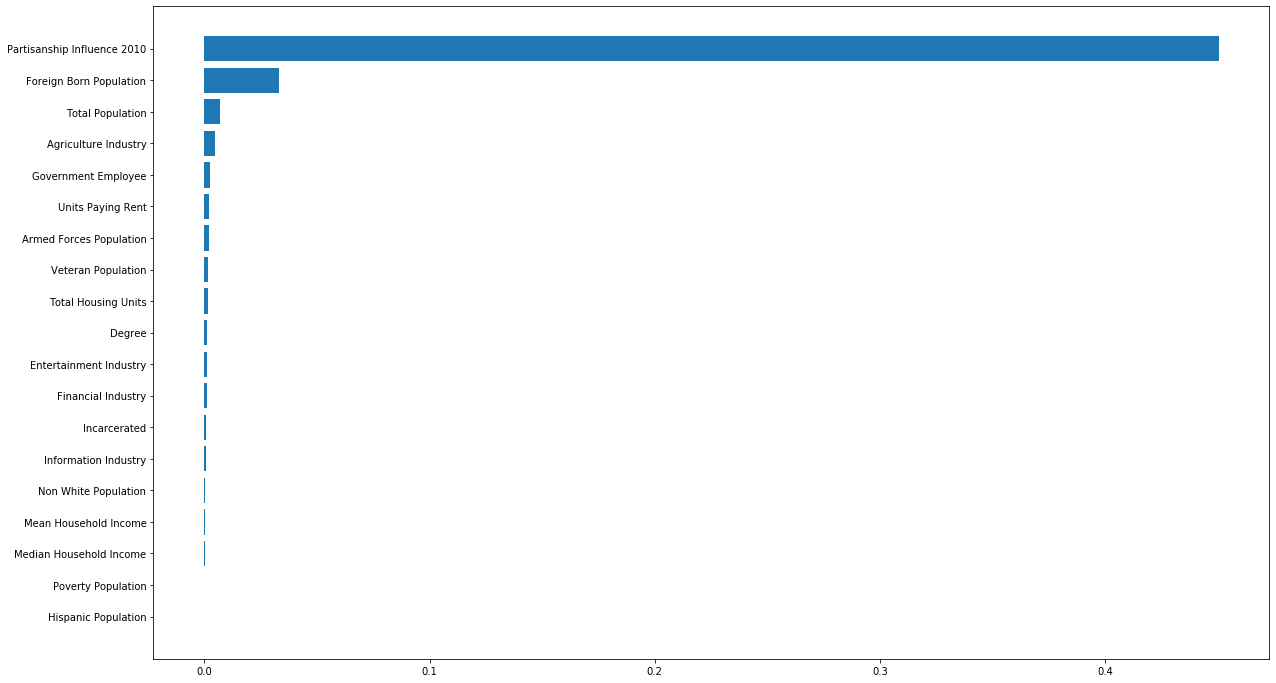

In [191]:
plt.figure(figsize=(20,12))
dat = pd.Series(reps_out_n_interest).sort_values()
plt.barh([x.replace('_', ' ').title() for x in dat.index], dat)

In [195]:
sum({k:v for k,v in reps_out_n_interest.items() if 'influence' not in k}.values())

0.06128333333333402

In [197]:
dems_df_n_interest = pd.concat(map(lambda x:df3.groupby(by='categorization').get_group(x), ['DsD', 'DsN', 'DsR']))
dems_df_n_interest = dems_df_n_interest.sample(frac = 1)
train, test = train_test_split(dems_df_n_interest, test_size=0.2)
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)
X_train = X_train.drop(columns=[x for x in X_train if 'interest' in x or 'political' in x])
X_test = X_test[X_train.columns]
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
RF_classifier.fit(X_train, Y_train)
print(RF_classifier.score(X_test, Y_test))
dems_out_n_interest = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    dems_out_n_interest[x] = temp

0.9523333333333334
total_population 0.0015500000000000513
non_white_population 0.002650000000000041
hispanic_population 0.0025166666666667226
foreign_born_population 0.003466666666666729
median_household_income 0.0006833333333333691
mean_household_income 0.0020999999999999908
poverty_population 0.002066666666666661
total_housing_units 0.0014000000000000679
units_paying_rent 0.001183333333333425
agriculture_industry 0.002866666666666684
information_industry 0.0009333333333333416
financial_industry 0.0019166666666666776
entertainment_industry 0.0012666666666667492
government_employee 0.002650000000000041
armed_forces_population 0.0020499999999999963
degree 0.0015500000000000513
veteran_population 0.0012333333333334195
incarcerated 0.0008666666666666822
partisanship_influence_2010 0.5102666666666666


In [199]:
sum({k:v for k,v in dems_out_n_interest.items() if 'influence' not in k}.values())

0.0329500000000007

In [198]:
n_df_n_interest = pd.concat(map(lambda x:df3.groupby(by='categorization').get_group(x), ['NsD', 'NsN', 'NsR']))
n_df_n_interest = n_df_n_interest.sample(frac = 1)
train, test = train_test_split(n_df_n_interest, test_size=0.2)
Y_train = train['categorization']
X_train = train.drop(columns=['categorization'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['categorization']
X_test = pd.DataFrame(scaler.transform(test[X_train.columns]), columns=X_train.columns)
X_train = X_train.drop(columns=[x for x in X_train if 'interest' in x or 'political' in x])
X_test = X_test[X_train.columns]
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)
RF_classifier.fit(X_train, Y_train)
print(RF_classifier.score(X_test, Y_test))
n_out_n_interest = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(x, temp)
    n_out_n_interest[x] = temp

0.508
total_population 0.0033166666666667455
non_white_population -0.0008833333333333471
hispanic_population -0.0012166666666666437
foreign_born_population 0.0022999999999999687
median_household_income -0.0005333333333332746
mean_household_income 0.0003166666666666318
poverty_population -0.0005833333333333801
total_housing_units 0.0007000000000000339
units_paying_rent 0.002066666666666661
agriculture_industry 0.00336666666666674
information_industry 0.0003500000000000725
financial_industry -0.0003333333333332966
entertainment_industry -6.666666666665932e-05
government_employee -0.0010166666666666657
armed_forces_population -0.00044999999999995044
degree 0.0014500000000000624
veteran_population -0.0001666666666666483
incarcerated -0.0013166666666666327
partisanship_influence_2010 0.10005000000000003


In [200]:
sum({k:v for k,v in n_out_n_interest.items() if 'influence' not in k}.values())

0.007300000000000417

<BarContainer object of 6 artists>

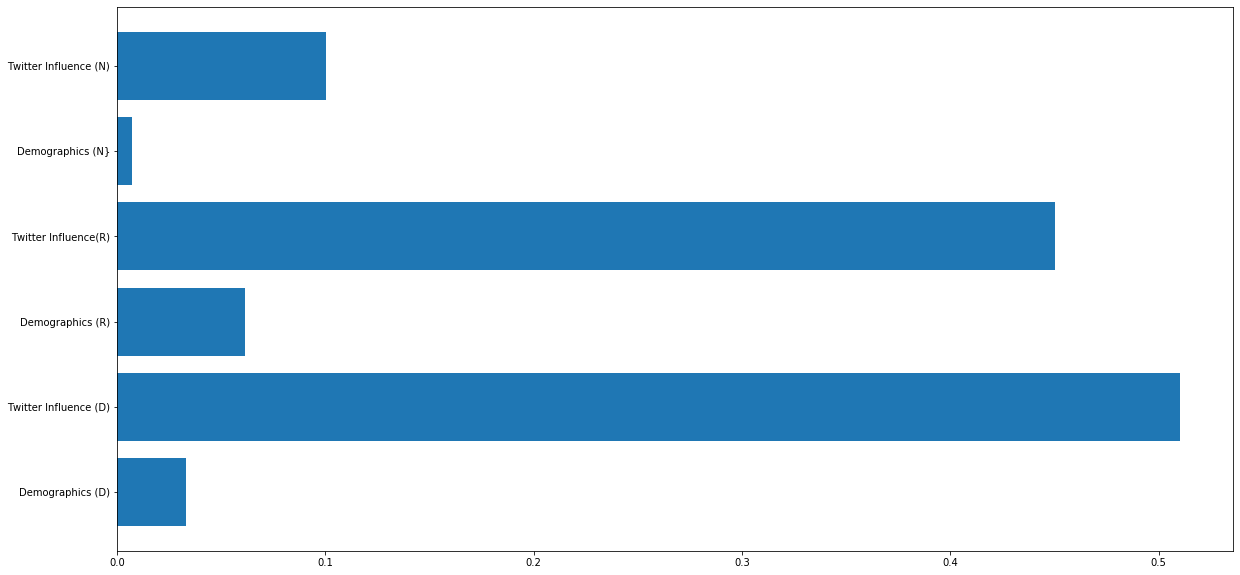

In [203]:
data = {"Demographics (D)" : 0.03295,
       "Twitter Influence (D)" : 0.51026667,
       "Demographics (R)" : 0.0612833333,
       "Twitter Influence(R)" : 0.4503666667,
       "Demographics (N}" : 0.0073,
       "Twitter Influence (N)":0.10005}
data_series = pd.Series(data)
plt.figure(figsize=(20,10))
plt.barh(data_series.index, data_series)

In [220]:
data = pd.DataFrame({'Demographics':[0.03295, 0.061283333,0.0073], 'Twitter Influence':[0.5102666667, 0.45102666667, 0.10005], 'Random Guess':[0.33333333]*3, 'total':[0.9523333, 0.88566667, 0.508]}, index=['Democrat','Republican','Non-Partisan'])

In [221]:
data['sum_all'] = data['Demographics'] + data['Twitter Influence'] + data['Random Guess']
data['other'] = data['total'] - data['sum_all']

In [222]:
data

,Demographics,Twitter Influence,Random Guess,total,sum_all,other
Democrat,0.032950,0.510267,0.333333,0.952333,0.876550,0.075783
Republican,0.061283,0.451027,0.333333,0.885667,0.845643,0.040023
Non-Partisan,0.007300,0.100050,0.333333,0.508000,0.440683,0.067317


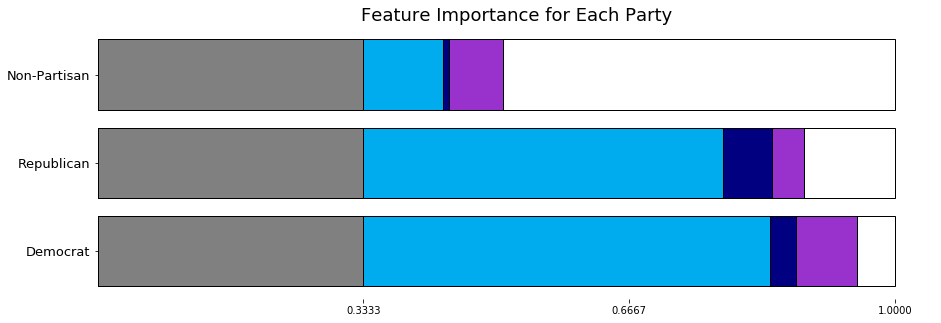

In [351]:
f = plt.figure(figsize=(15,5))
plt.barh(data.index, [1,1,1], color="white", edgecolor="black")
plt.barh(data.index,data['Random Guess'], color="grey", edgecolor='black', label='Random')
plt.barh(data.index, data['Twitter Influence'], left=data['Random Guess'], color='#00ACEE', edgecolor='black',label='Twitter')
plt.barh(data.index, data['Demographics'], left=data['Random Guess']+data['Twitter Influence'], color="navy", edgecolor='black', label='Demographics')

plt.barh(data.index, data['other'], left=data['sum_all'], color='darkorchid', edgecolor='black', label='Other')
ax = plt.gca()
ax.set_yticklabels(['Democrat', 'Republican', 'Non-Partisan'],fontdict={'fontsize':13})
ax.set_frame_on(False)
plt.xticks([0.3333333, 0.666666666, 1])
plt.title("Feature Importance for Each Party", fontsize=18)
plt.savefig("party_features.png")

In [252]:
dems_dat = pd.Series(dems_out_n_infl).sort_values()
reps_dat = pd.Series(reps_out_n_infl)[dems_dat.index]
n_dat = pd.Series(n_out_n_infl)[dems_dat.index]

In [304]:
import matplotlib as matplot

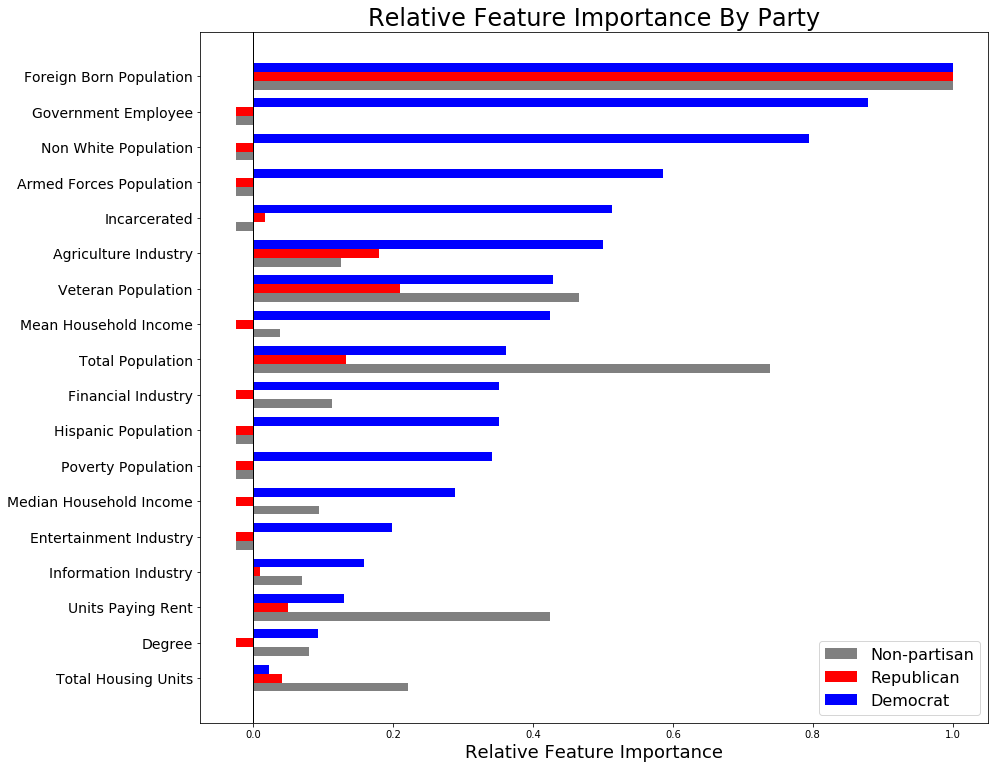

In [333]:
import numpy as np
plt.figure(figsize=(15,12))
width = 0.25
reps_dat.loc[reps_dat<0] = -0.025*max(reps_dat)
n_dat.loc[n_dat<0] = -0.025 * max(n_dat)
plt.barh(np.arange(len(dems_dat.index)), n_dat/max(n_dat), height=width,label='Non-partisan', color="grey")
plt.barh(np.arange(len(dems_dat.index)) + width,reps_dat/max(reps_dat),height=width,label='Republican', color="red")
plt.barh(np.arange(len(dems_dat.index))+ 2*width,dems_dat/max(dems_dat),height=width,label='Democrat', color="blue")
plt.axvline(x=0.0, color='black', linewidth=1.0)
#matplot.pyplot.yticks(np.arange(len(dems_dat.index)), [x.replace("_", " ").title() for x in dems_dat.index])
ax = plt.gca()
ax.set_yticks(np.arange(len(dems_dat.index))+width)
ax.set_yticklabels([x.replace('_', ' ').title() for x in dems_dat.index], fontdict={'fontsize':14})
ax.set_position((0.25,0.15,0.73,0.80))
plt.xlabel("Relative Feature Importance", fontsize=18)
plt.title("Relative Feature Importance By Party", fontsize=24)
plt.legend(loc='best',prop={'size':16})
plt.savefig("all_features_by_party.png")

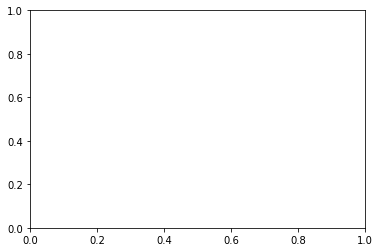

In [331]:
plt.gca()

In [285]:
labels

Index(['total_housing_units', 'degree', 'units_paying_rent',
       'information_industry', 'entertainment_industry',
       'median_household_income', 'poverty_population', 'hispanic_population',
       'financial_industry', 'total_population', 'mean_household_income',
       'veteran_population', 'agriculture_industry', 'incarcerated',
       'armed_forces_population', 'non_white_population',
       'government_employee', 'foreign_born_population'],
      dtype='object')

In [288]:
plt.yticks

(array([ 0.25,  1.25,  2.25,  3.25,  4.25,  5.25,  6.25,  7.25,  8.25,
         9.25, 10.25, 11.25, 12.25, 13.25, 14.25, 15.25, 16.25, 17.25]),
 Index(['total_housing_units', 'degree', 'units_paying_rent',
        'information_industry', 'entertainment_industry',
        'median_household_income', 'poverty_population', 'hispanic_population',
        'financial_industry', 'total_population', 'mean_household_income',
        'veteran_population', 'agriculture_industry', 'incarcerated',
        'armed_forces_population', 'non_white_population',
        'government_employee', 'foreign_born_population'],
       dtype='object'))

In [299]:
from matplotlib.pyplot import yticks

ImportError: cannot import name 'yticks' from 'matplotlib.pyplot' (C:\Users\ericj\Anaconda3\lib\site-packages\matplotlib\pyplot.py)

In [300]:
yticks

NameError: name 'yticks' is not defined

In [295]:
del yticks

In [297]:
del plt.yticks

AttributeError: module 'matplotlib.pyplot' has no attribute 'yticks'